# Project: Medical Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will analyze a dataset of Medical Appointments mainly regarding if the patient will show up or not to the appointment.
>
> The dataset contains 14 attributes which are ( PatientId , AppointmentID , Gender , AppointmentDay , ScheduledDay , Age , Neighbourhood , Scholarship , Hipertension , Diabetes , Alcoholism , Handcap , SMS_received , No-show ).
>
> No - show attribute is the main dependent variable we're investigating.

### The main Analysis Questions are : 

>1. What is the percentage of showed up to the not showed up patients ?
>
>2. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment ?
>
>   In this Question we try to get relation between showing up in appointment and other data attributes such as :
>   Age , Gender , Diabetes and Scholarship.

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# Loading data
df = pd.read_csv('medical_appointments.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


>**Note** : From the previous step it's clear that naming data attributes doesn't follow clean formatting.
>
>This will be modified later.

In [5]:
# Dataset Dimensions
df.shape

(110527, 14)

In [6]:
# getting more info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# apply some statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>**Note** : From the previous step we've noticed that there is uncompatable age value ( Negative ) , we'll modify later.

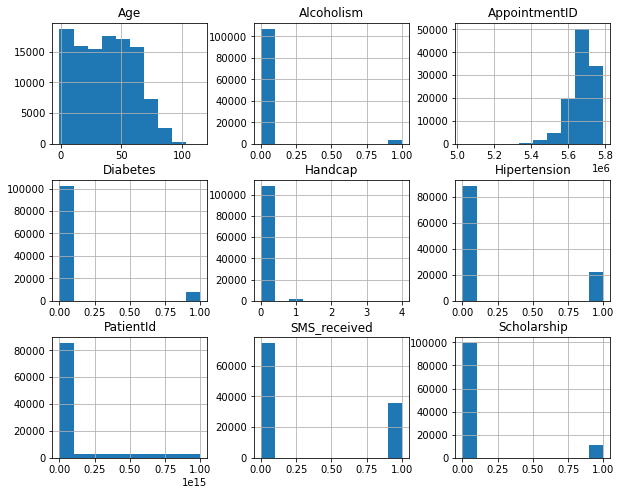

In [8]:
# overall visual investigation
df.hist(figsize=(10,8));

Text(0.5, 1.0, 'Female to male Count Appling For Appointment')

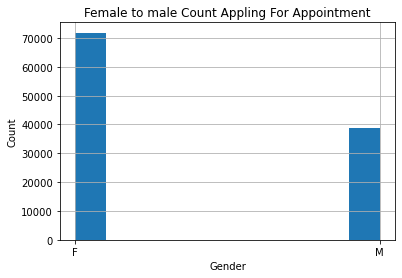

In [85]:
# ratio between males and females applying for appointment 
df['Gender'].hist();
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title('Female to male Count Appling For Appointment')

**Note** : The plot clearly shows that the number of females applying for an appointment is greater than that of males.

### Data Cleaning

<ol>
    <li>Naming Columns</li>
    <li>Missing Values</li>
    <li>Duplicated Rows</li>
    <li>Datatypes Errors</li>
    <li>Check if there is incompatible  value</li>
    <li>Modify No_show attribute so as to be used in visuals</li>
</ol>

#### First : Naming columns with more neat formatting

In [11]:
# rename columns 
df.rename(columns = {'PatientId' : 'Patient_Id', 'AppointmentID' : 'Appointment_ID' , 
                     'ScheduledDay' : 'Scheduled_Day' , 'AppointmentDay' : 'Appointment_Day' ,
                     'No-show':'No_show'}, inplace = True)
# df.head(1)
df.columns

Index(['Patient_Id', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No_show'],
      dtype='object')

#### Second : Check for Null Values , Duplicated rows and Data type errors .

In [12]:
# Null Values Check
df.isnull().sum().any()

False

> There is no null values detected.

In [13]:
# Duplicates Check
df.duplicated().sum()

0

> The Data set is free of Duplicates.

In [14]:
# Getting Data Types 
attributes = ['Patient_Id', 'Appointment_ID', 'Gender', 'Scheduled_Day', 'Appointment_Day',
              'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
              'Alcoholism', 'Handcap', 'SMS_received', 'No_show']
for atr in attributes :
    print(atr , type(df[atr][0]))

Patient_Id <class 'numpy.float64'>
Appointment_ID <class 'numpy.int64'>
Gender <class 'str'>
Scheduled_Day <class 'str'>
Appointment_Day <class 'str'>
Age <class 'numpy.int64'>
Neighbourhood <class 'str'>
Scholarship <class 'numpy.int64'>
Hipertension <class 'numpy.int64'>
Diabetes <class 'numpy.int64'>
Alcoholism <class 'numpy.int64'>
Handcap <class 'numpy.int64'>
SMS_received <class 'numpy.int64'>
No_show <class 'str'>


>**Note** : From previous step the datatype of Scheduled_Day and Appointment_Day must be timestamp format instead of string.

In [15]:
# convert string to timestamp datatype in Scheduled_Day  
df['Scheduled_Day']= pd.to_datetime(df['Scheduled_Day'])
print(type(df['Scheduled_Day'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [16]:
# convert string to timestamp datatype in Appointment_Day
df['Appointment_Day']= pd.to_datetime(df['Appointment_Day'])
print(type(df['Appointment_Day'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


> Data Types Errors Detected in Scheduled_Day and Appointment_Day then modified.

#### Third : incompatible value in age column is detected

In [17]:
# Negative value of Age attribute is detected in summary statistics so first check negative values
print((df['Age'] <  0).sum())

1


In [18]:
# it's clear that one value is less than zero exists
# We could replace it with mean value of age column
mean_age = df['Age'].mean()
df['Age'].values[df['Age'] <= 0] = mean_age

In [19]:
# Check if negative value is removed 
print((df['Age'] <  0).sum())

0


> Negative value in Age attribute is detected and replaced by mean ages.

#### Change values in No_show attribute to be zeros and ones instead of yes and no to be clearly used in visuals in the next step.

In [20]:
df['No_show'].values[df['No_show'] == 'Yes'] = 1
df['No_show'].values[df['No_show'] == 'No'] = 0
# check changes
df['No_show'].value_counts()

0    88208
1    22319
Name: No_show, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### What is the percentage of showed up to the not showed up patients ?

In [46]:
# apply data mask for showed and not showed
showed  = df['No_show'] == 0
Not_showed  = df['No_show'] == 1

In [47]:
df['showed'] = showed
df['Not_showed'] = Not_showed

In [22]:
# number of showed and not showed
showed_count = showed.sum()
Not_showed_count = Not_showed.sum()
print('number of people showed is {} and number of people not showed is {} '.format(showed_count,Not_showed_count))

number of people showed is 88208 and number of people not showed is 22319 


In [23]:
total_patients = df.shape[0]
total_patients

110527

In [24]:
# getting probability of people of showed up versus who didn't show
prop_showed = showed_count/total_patients
prop_not_showed = Not_showed_count/total_patients
prop_showed, prop_not_showed

(0.798067440534892, 0.20193255946510807)

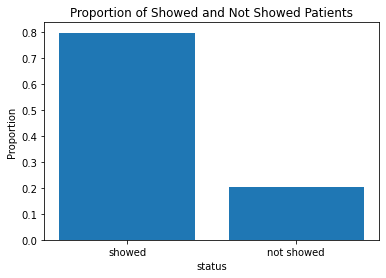

In [136]:
# visualizing results
plt.bar(["showed", "not showed"], [prop_showed, prop_not_showed])
plt.title("Proportion of Showed and Not Showed Patients")
plt.xlabel("status")
plt.ylabel("Proportion");

##### from previous it's clear that percentage of showed patients is larger and equal to 79.81% while that of not showed is 20.19%

### What  factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

First, we'll make a function to plot results

In [86]:
# function that is used in plotting
def plotting(group , status , plot_kind , x_label , y_label , plot_title):
    df.groupby(group)[status].mean().plot(kind = plot_kind);
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    plt.legend();
    
#function that adds labels for histograms
def hist_labels(x_label , y_label , plot_title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    plt.legend();

#### Parameter #1  : Get relation between patient show up in appointment and age

In [35]:
# getting mean Age of showed patients
df.Age[showed].mean()

39.00693814619989

In [26]:
# getting mean Age of not showed patients
df.Age[Not_showed].mean()

35.37698821631793

##### from the previous we can conclude that the mean age of showed patients is bigger than that of not showed.

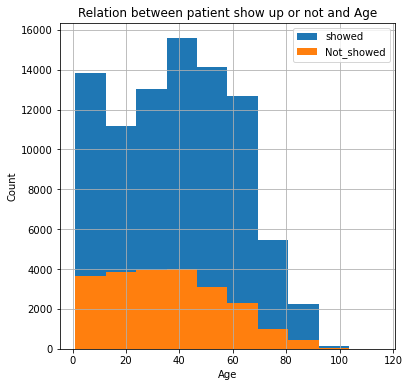

In [78]:
df.Age[showed].hist(label='showed' , figsize = (6,6));
df.Age[Not_showed].hist(label='Not_showed' , figsize = (6,6));
hist_labels('Age' , 'Count' ,  'Relation between patient show up or not and Age')

> The previous plot shows the distribution of patient ages and if they showed or not.
> it's obvious that nearly all the age bins have values in both show up and didn't show up.

#### Parameter #2 : Get relation between patient show up in appointment and Gender

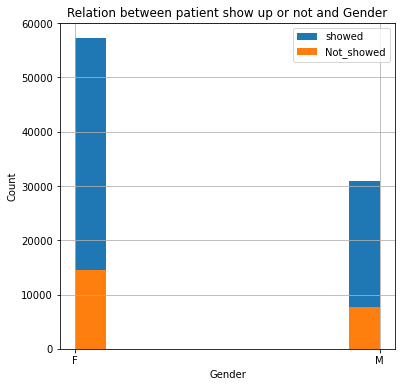

In [79]:
df.Gender[showed].hist(label='showed' , figsize = (6,6));
df.Gender[Not_showed].hist(label='Not_showed' , figsize = (6,6));
hist_labels('Gender' , 'Count' ,  'Relation between patient show up or not and Gender')

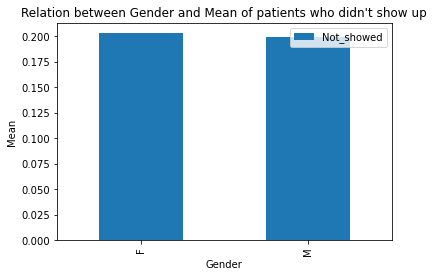

In [68]:
# getting mean number of not showed patients for each gender
plotting('Gender' , 'Not_showed' , 'bar' , 'Gender' , 'Mean' , 'Relation between Gender and Mean of patients who didn\'t show up')

> The number of female patients is larger than males , but on studying the not showed people the mean number of males is nearly equal to that of females.
> so we couldn't determine if patient show up or not based on gender only.

#### Parameter #3 : Get relation between patient show up in appointment and Diabetes

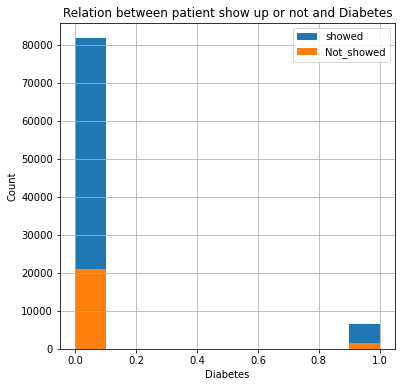

In [80]:
# getting count of diabetes patients who show up or not versus non diabetes patients
df.Diabetes[showed].hist(label='showed' , figsize = (6,6));
df.Diabetes[Not_showed].hist(label='Not_showed' , figsize = (6,6));
hist_labels('Diabetes' , 'Count' ,  'Relation between patient show up or not and Diabetes')

> from this distribution it's clear that the number of Diabetes patients is less than that of non diabetes in both cases of show up or not so furthur analysis is needed to get the mean relations.

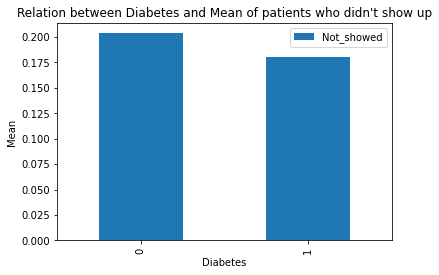

In [69]:
#getting mean of diabetes patients who didn't show up
plotting('Diabetes' , 'Not_showed' , 'bar' , 'Diabetes' , 'Mean' , 'Relation between Diabetes and Mean of patients who didn\'t show up')

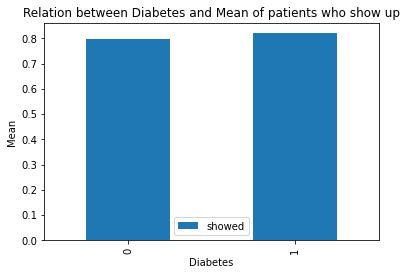

In [70]:
#getting mean of diabetes patients who show up
plotting('Diabetes' , 'showed' , 'bar' , 'Diabetes' , 'Mean' , 'Relation between Diabetes and Mean of patients who show up')

> On studying the diabetes effect on patient to show or not we found out it's not a factor that determine the patient status.

#### Parameter #4 : Get relation between patient show up in appointment and Scholarship

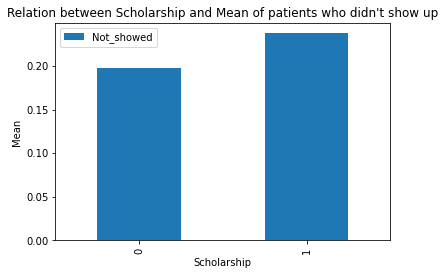

In [71]:
#getting mean of Scholarship patients who didn't show up
plotting('Scholarship' , 'Not_showed' , 'bar' , 'Scholarship' , 'Mean' , 'Relation between Scholarship and Mean of patients who didn\'t show up')

In [51]:
# geeting the exact ratio of people who didn't show up in case of scholarship or not
df.groupby('Scholarship')['Not_showed'].mean()

Scholarship
0    0.198072
1    0.237363
Name: Not_showed, dtype: float64

> The people on scolarship are most likely not to show up in an appointment with percentage 23.7% versus no scholarship with percentage 19.8%.

<a id='conclusions'></a>
## Conclusions
#### Data Cleaning Conclusions:
<ul>
    <li>There is no null values detected.</li>
    <li>The Data set is free of Duplicates.</li>
    <li>Data Types Errors Detected in Scheduled_Day and Appointment_Day then modified.</li>
    <li>Negative value in Age attribute is detected and replaced by mean ages.</li>
    <li>Modify the values in No_show column to be zeros and ones instead of yes and no to be able to be used easier in the next step of Exploring Data with Visuals.</li>
</ul>

#### Analysis Conclusions:
> From our previous study we found out that the percentage of showed patients is larger and equal to 79.81% while that of not showed is 20.19%.
>
> The mean Age of showed patients is 39 versus the mean Age of not showed ones 35 years.
>
> The number of female patients is larger than males , but on studying the not showed people the mean number of males is nearly equal to that of females.
> 
> On studying the diabetes effect on patient to show or not we found out it's not a factor that determine the patient status.
>
> The people on scolarship are most likely not to show up in an appointment with percentage 23.7% versus no scholarship with percentage 19.8%.

### Some Limitations in the Analysis Process
 > This Analysis is mainly based on Descriptive Statistics there is no inferential statistics implied in the analsis.
 >
 > The Data outlier in the Age attribute which is replaced by the mean may affect the results if it's treated differently.